In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import matplotlib
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp

In [3]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 6.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633703 sha256=a5c9daf5e8f1cdd1063599d15bf03eaa5aab5974c14d3ccfc3d0ff8bb8fe7996
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [5]:
#Load datafiniti hotel reviews dataset
dataset = pd.read_csv('/content/drive/MyDrive/Hotel_Recomendation_Model_Traveloka/Eksplorasi Data/Datafiniti_Hotel_Reviews_Jun19.csv')
dataset

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9996,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,2016-04-03T00:00:00Z,5,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9997,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",A

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Take data columns hotel_id, review_username, and reviews_rating and sorting it by username
user_rating = pd.DataFrame(dataset, columns=['id', 'reviews.username', 'reviews.rating'])
user_rating = user_rating.sort_values(['reviews.username'])
user_rating

,id,reviews.username,reviews.rating
4954,AVwd5NMOkufWRAb5-Ldv,#1Cubsfan,4
6033,AV1Ts63z3D1zeR_xFH6n,007traveler64,5
3211,AVwduimh_7pvs4fz8tSx,0413beanie,2
5360,AVwdV3-D_7pvs4fz43p7,059DebDeb056,5
7894,AVwcgshl_7pvs4fzv3ge,09LCM,4
...,...,...,...
9870,AV1Ts5IFLD2H7whiaPiu,zlbenites,5
317,AWB2X-9e3-Khe5l_cVCf,zonie0531,3
5767,AVwcps_sByjofQCxgriK,zztravelerzz,4
3196,AVwc9sJZByjofQCxkFzD,zzzbill,4


In [7]:
# Drop duplicate data id_hotel based on user_rating data
hotel_unique = user_rating.drop_duplicates(subset=['id'], keep='first')
hotel_unique

,id,reviews.username,reviews.rating
4954,AVwd5NMOkufWRAb5-Ldv,#1Cubsfan,4
6033,AV1Ts63z3D1zeR_xFH6n,007traveler64,5
3211,AVwduimh_7pvs4fz8tSx,0413beanie,2
5360,AVwdV3-D_7pvs4fz43p7,059DebDeb056,5
7894,AVwcgshl_7pvs4fzv3ge,09LCM,4
...,...,...,...
1115,AVwclNcUIN2L1WUfmk6O,viclmzn,1
8415,AVwdKpKWkufWRAb52-u5,vinchregression,5
7678,AVwc6Hq2ByjofQCxjf93,waxapple,4
3635,AVzoMUvgLD2H7whiXmq_,wjbruckner,5


In [8]:
# Take only id_hotel
hotel_unique_id = hotel_unique['id']
hotel_unique_id

4954    AVwd5NMOkufWRAb5-Ldv
6033    AV1Ts63z3D1zeR_xFH6n
3211    AVwduimh_7pvs4fz8tSx
5360    AVwdV3-D_7pvs4fz43p7
7894    AVwcgshl_7pvs4fzv3ge
                ...         
1115    AVwclNcUIN2L1WUfmk6O
8415    AVwdKpKWkufWRAb52-u5
7678    AVwc6Hq2ByjofQCxjf93
3635    AVzoMUvgLD2H7whiXmq_
5430    AV4_H_UZ3-Khe5l_TDFN
Name: id, Length: 1433, dtype: object

In [9]:
# Drop duplicate reviews_username based on user_rating data
user_unique = user_rating.drop_duplicates(subset=['reviews.username'], keep='first')
user_unique

,id,reviews.username,reviews.rating
4954,AVwd5NMOkufWRAb5-Ldv,#1Cubsfan,4
6033,AV1Ts63z3D1zeR_xFH6n,007traveler64,5
3211,AVwduimh_7pvs4fz8tSx,0413beanie,2
5360,AVwdV3-D_7pvs4fz43p7,059DebDeb056,5
7894,AVwcgshl_7pvs4fzv3ge,09LCM,4
...,...,...,...
9870,AV1Ts5IFLD2H7whiaPiu,zlbenites,5
317,AWB2X-9e3-Khe5l_cVCf,zonie0531,3
5767,AVwcps_sByjofQCxgriK,zztravelerzz,4
3196,AVwc9sJZByjofQCxkFzD,zzzbill,4


In [10]:
# Take only review_user_unique_data
user_unique_data = pd.DataFrame(user_unique, columns=['reviews.username', 'reviews.rating'])
user_unique_data

,reviews.username,reviews.rating
4954,#1Cubsfan,4
6033,007traveler64,5
3211,0413beanie,2
5360,059DebDeb056,5
7894,09LCM,4
...,...,...
9870,zlbenites,5
317,zonie0531,3
5767,zztravelerzz,4
3196,zzzbill,4


In [11]:
# Step - 2

In [12]:
# Calculate count of review for each hotel
hotel_unique_total_reviews = pd.DataFrame(user_rating.groupby(['id'])['reviews.rating'].count())
hotel_unique_total_reviews

,reviews.rating
id,
AV--lQdFRxPSIh2RmtbT,69
AV--lmxKIxWefVJwsReI,1
AV--luVA3-Khe5l_ZMEJ,1
AV-AN728a4HuVbedGQnJ,90
AV-Cilg2a4HuVbedGQqK,6
...,...
AWdgUTtXa4HuVbedaODu,1
AWdlE0rK3-Khe5l_tDlq,36
AWfPeemaa4HuVbeddb2K,66


In [13]:
# Calculate Sum of Rating for each Hotel
sum_reviews_each_hotel = pd.DataFrame(user_rating.groupby(['id'])['reviews.rating'].sum())
sum_reviews_each_hotel

,reviews.rating
id,
AV--lQdFRxPSIh2RmtbT,261
AV--lmxKIxWefVJwsReI,5
AV--luVA3-Khe5l_ZMEJ,5
AV-AN728a4HuVbedGQnJ,370
AV-Cilg2a4HuVbedGQqK,26
...,...
AWdgUTtXa4HuVbedaODu,4
AWdlE0rK3-Khe5l_tDlq,139
AWfPeemaa4HuVbeddb2K,257


In [14]:
# Sort user_rating data based on hotel_id
sort_hotel_unique = hotel_unique.sort_values('id')
sort_hotel_unique

,id,reviews.username,reviews.rating
6123,AV--lQdFRxPSIh2RmtbT,37abhijitg,3
1552,AV--lmxKIxWefVJwsReI,foodies311,5
3220,AV--luVA3-Khe5l_ZMEJ,Bill B,5
5637,AV-AN728a4HuVbedGQnJ,26jrr,4
8337,AV-Cilg2a4HuVbedGQqK,Charles S,4
...,...,...,...
1657,AWdgUTtXa4HuVbedaODu,jackehill,4
1752,AWdlE0rK3-Khe5l_tDlq,267alenkar,4
6652,AWfPeemaa4HuVbeddb2K,160edwardr,2
1919,AWfaJjQba4HuVbeddiSW,94tammyv,5


In [15]:
# Assign new column for each hotel
id_hotel = sort_hotel_unique['id'].values
count_review_hotel = hotel_unique_total_reviews['reviews.rating'].values
sum_review_hotel = sum_reviews_each_hotel['reviews.rating'].values

average_review_hotel = sum_review_hotel / count_review_hotel

hotel = {
    'hotel_id':id_hotel,
    'count_reviews':count_review_hotel,
    'sum_reviews':sum_review_hotel,
    'average_reviews':average_review_hotel
}

new_data_hotel = pd.DataFrame(hotel)
new_data_hotel

,hotel_id,count_reviews,sum_reviews,average_reviews
0,AV--lQdFRxPSIh2RmtbT,69,261,3.782609
1,AV--lmxKIxWefVJwsReI,1,5,5.000000
2,AV--luVA3-Khe5l_ZMEJ,1,5,5.000000
3,AV-AN728a4HuVbedGQnJ,90,370,4.111111
4,AV-Cilg2a4HuVbedGQqK,6,26,4.333333
...,...,...,...,...
1428,AWdgUTtXa4HuVbedaODu,1,4,4.000000
1429,AWdlE0rK3-Khe5l_tDlq,36,139,3.861111
1430,AWfPeemaa4HuVbeddb2K,66,257,3.893939
1431,AWfaJjQba4HuVbeddiSW,2,10,5.000000


In [16]:
# Step - 3

In [17]:
# Calculate count of reviews for each user
user_unique_total_reviews = pd.DataFrame(user_rating.groupby(['reviews.username'])['reviews.rating'].count())
user_unique_total_reviews

,reviews.rating
reviews.username,
#1Cubsfan,1
007traveler64,1
0413beanie,1
059DebDeb056,1
09LCM,2
...,...
zlbenites,1
zonie0531,1
zztravelerzz,1


In [18]:
# Calculate sum of reviews for each user
sum_reviews_each_user = pd.DataFrame(user_rating.groupby(['reviews.username'])['reviews.rating'].sum())
sum_reviews_each_user

,reviews.rating
reviews.username,
#1Cubsfan,4
007traveler64,5
0413beanie,2
059DebDeb056,5
09LCM,8
...,...
zlbenites,5
zonie0531,3
zztravelerzz,4


In [19]:
# Sort user_unique_data data based on reviews.username
sort_user_unique_data = user_unique_data.sort_values('reviews.username')
sort_user_unique_data

,reviews.username,reviews.rating
4954,#1Cubsfan,4
6033,007traveler64,5
3211,0413beanie,2
5360,059DebDeb056,5
7894,09LCM,4
...,...,...
9870,zlbenites,5
317,zonie0531,3
5767,zztravelerzz,4
3196,zzzbill,4


In [20]:
# Assign new column for each user
username = sort_user_unique_data['reviews.username'].values
count_review_user = user_unique_total_reviews['reviews.rating'].values
sum_review_user = sum_reviews_each_user['reviews.rating'].values

average_review_user = sum_review_user / count_review_user

user_reviews = {
    'username':username,
    'count_reviews':count_review_user,
    'sum_reviews':sum_review_user,
    'average_reviews':average_review_user
}

new_data_user = pd.DataFrame(user_reviews)
new_data_user

,username,count_reviews,sum_reviews,average_reviews
0,#1Cubsfan,1,4,4.0
1,007traveler64,1,5,5.0
2,0413beanie,1,2,2.0
3,059DebDeb056,1,5,5.0
4,09LCM,2,8,4.0
...,...,...,...,...
9217,zlbenites,1,5,5.0
9218,zonie0531,1,3,3.0
9219,zztravelerzz,1,4,4.0
9220,zzzbill,1,4,4.0


In [21]:
# Group by data by each rating to visualize data
group_by_rating = pd.DataFrame(user_rating.groupby(['reviews.rating'])['reviews.username'].count())
group_by_rating

,reviews.username
reviews.rating,
1,567
2,554
3,1190
4,2849
5,4840


<Figure size 432x288 with 0 Axes>

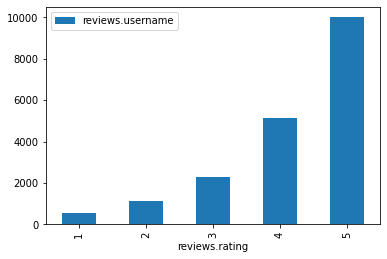

In [22]:
dd = group_by_rating.cumsum()
plt.figure()
dd.plot.bar()

In [23]:
visualize_hotel = pd.DataFrame(new_data_hotel, columns=['average_reviews'])
visualize_hotel

,average_reviews
0,3.782609
1,5.000000
2,5.000000
3,4.111111
4,4.333333
...,...
1428,4.000000
1429,3.861111
1430,3.893939
1431,5.000000


<Figure size 432x288 with 0 Axes>

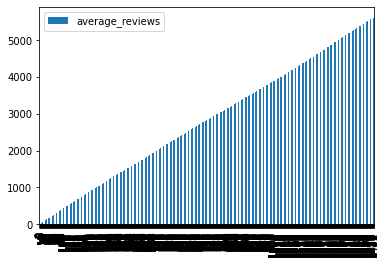

In [24]:
cc = visualize_hotel.cumsum()
plt.figure()
cc.plot.bar()

In [25]:
user_rating

,id,reviews.username,reviews.rating
4954,AVwd5NMOkufWRAb5-Ldv,#1Cubsfan,4
6033,AV1Ts63z3D1zeR_xFH6n,007traveler64,5
3211,AVwduimh_7pvs4fz8tSx,0413beanie,2
5360,AVwdV3-D_7pvs4fz43p7,059DebDeb056,5
7894,AVwcgshl_7pvs4fzv3ge,09LCM,4
...,...,...,...
9870,AV1Ts5IFLD2H7whiaPiu,zlbenites,5
317,AWB2X-9e3-Khe5l_cVCf,zonie0531,3
5767,AVwcps_sByjofQCxgriK,zztravelerzz,4
3196,AVwc9sJZByjofQCxkFzD,zzzbill,4


In [26]:
hotel_unique_id

4954    AVwd5NMOkufWRAb5-Ldv
6033    AV1Ts63z3D1zeR_xFH6n
3211    AVwduimh_7pvs4fz8tSx
5360    AVwdV3-D_7pvs4fz43p7
7894    AVwcgshl_7pvs4fzv3ge
                ...         
1115    AVwclNcUIN2L1WUfmk6O
8415    AVwdKpKWkufWRAb52-u5
7678    AVwc6Hq2ByjofQCxjf93
3635    AVzoMUvgLD2H7whiXmq_
5430    AV4_H_UZ3-Khe5l_TDFN
Name: id, Length: 1433, dtype: object

In [27]:
# Replace username with user_id and id with hotel_id int type
new_data_rating = user_rating.copy()
new_data_rating

,id,reviews.username,reviews.rating
4954,AVwd5NMOkufWRAb5-Ldv,#1Cubsfan,4
6033,AV1Ts63z3D1zeR_xFH6n,007traveler64,5
3211,AVwduimh_7pvs4fz8tSx,0413beanie,2
5360,AVwdV3-D_7pvs4fz43p7,059DebDeb056,5
7894,AVwcgshl_7pvs4fzv3ge,09LCM,4
...,...,...,...
9870,AV1Ts5IFLD2H7whiaPiu,zlbenites,5
317,AWB2X-9e3-Khe5l_cVCf,zonie0531,3
5767,AVwcps_sByjofQCxgriK,zztravelerzz,4
3196,AVwc9sJZByjofQCxkFzD,zzzbill,4


In [28]:
def generateId(data, items, keyword):
  # temp = []
  # user_id = []
  # i = 0
  # for user in data.username:
  #   if user not in temp:
  #     temp.append(user)
  #     user_id.append(i+1)
  #     i += 1
  #   else:
  #     user_id.append(i)
  x = 1
  
  for item in items:
    data[keyword].replace({item: x}, inplace=True)

    x = x + 1
  
  return data
  

In [29]:
new_data_rating = generateId(new_data_rating, hotel_unique_id, 'id')
new_data_rating

,id,reviews.username,reviews.rating
4954,1,#1Cubsfan,4
6033,2,007traveler64,5
3211,3,0413beanie,2
5360,4,059DebDeb056,5
7894,5,09LCM,4
...,...,...,...
9870,63,zlbenites,5
317,144,zonie0531,3
5767,164,zztravelerzz,4
3196,510,zzzbill,4


In [30]:
new_data_rating = generateId(new_data_rating, sort_user_unique_data['reviews.username'], 'reviews.username')
new_data_rating.columns = ['hotel_id', 'user_id', 'user_rating']
new_data_rating = new_data_rating.drop_duplicates(subset=['hotel_id', 'user_id'], keep='first')
new_data_rating.reset_index(drop=True, inplace=True)
new_data_rating

,hotel_id,user_id,user_rating
0,1,1,4
1,2,2,5
2,3,3,2
3,4,4,5
4,5,5,4
...,...,...,...
9743,63,9218,5
9744,144,9219,3
9745,164,9220,4
9746,510,9221,4


In [31]:
total_users = len(np.unique(new_data_rating["user_id"]))
                  
print("Total no. of Users = {}".format(total_users))

Total no. of Users = 9222


In [32]:
total_hotel = len(np.unique(new_data_rating["hotel_id"]))
                  
print("Total no. of Hotels = {}".format(total_hotel))

Total no. of Hotels = 1433


In [33]:
test1 = new_data_rating.drop_duplicates(subset=['hotel_id'], keep='first')
test1 = test1['hotel_id']
test1

0          1
1          2
2          3
3          4
4          5
        ... 
9619    1429
9625    1430
9653    1431
9696    1432
9720    1433
Name: hotel_id, Length: 1433, dtype: int64

In [34]:
test2 = new_data_rating.drop_duplicates(subset=['user_id'], keep='first')
test2 = test2['user_id']
test2

0          1
1          2
2          3
3          4
4          5
        ... 
9743    9218
9744    9219
9745    9220
9746    9221
9747    9222
Name: user_id, Length: 9222, dtype: int64

In [35]:
def generateVector(users, hotels, data):
  lengthUser = len(users)
  lengthHotel = len(hotels)

  user_vector = []
  hotel_vector = []
  rating_vector = []
  
  for i in range(lengthUser):

    user = np.zeros(lengthUser)
    hotel = np.zeros(lengthHotel)
    rating = np.zeros(lengthHotel)

    user[i] = 1

    filter_hotel = data[data['user_id'] == (i+1)]
    
    for item in filter_hotel.values:
      hotel[item[0]-1] = 1
      rating[item[0]-1] = item[2]
    
    hotel_vector.append(hotel)
    user_vector.append(user)
    rating_vector.append(rating)
  
  return np.array(user_vector), np.array(hotel_vector), np.array(rating_vector)



In [36]:
user_vector, hotel_vector, rating_vector = generateVector(test2, test1, new_data_rating)

In [37]:
user_vector

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [38]:
hotel_vector

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
rating_vector


array([[4., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
# for i in range(len(user_vector[2511])):
#   p = user_vector[2511][i]
#   if p == 1:
#     print(p)
#     print(i)
#     print(len(user_vector[2511]))


In [41]:
# for i in range(len(hotel_vector[2511])):
#   p = hotel_vector[2511][i]
#   if p == 1:
#     print(p)
#     print(i)
#     print(len(hotel_vector[2511]))

In [42]:
# for i in range(len(rating_vector[2511])):
#   p = rating_vector[2511][i]
#   if p > 0:
#     print(p)
#     print(i)
#     print(len(rating_vector[2511]))

In [112]:
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import adam_v2
from keras.regularizers import l2

import tensorflow as tf
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# warnings.filterwarnings('ignore')
# %matplotlib inline

In [49]:
user_enc = LabelEncoder()
new_data_rating['user_id'] = user_enc.fit_transform(new_data_rating['user_id'].values)
n_users = new_data_rating['user_id'].nunique()

item_enc = LabelEncoder()
new_data_rating['hotel_id'] = item_enc.fit_transform(new_data_rating['hotel_id'].values)
n_items = new_data_rating['hotel_id'].nunique()

new_data_rating['user_rating'] = new_data_rating['user_rating'].values.astype(np.float32)
min_rating = min(new_data_rating['user_rating'])
max_rating = max(new_data_rating['user_rating'])
n_users, n_items
print(min_rating, max_rating)

1.0 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [50]:
n_users, n_items

(9222, 1433)

In [53]:
X = new_data_rating[['user_id', 'hotel_id']].values
y = new_data_rating['user_rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9260, 2), (488, 2), (9260,), (488,))

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((8797, 2), (488, 2), (463, 2), (8797,), (488,), (463,))

In [156]:
n_factors = 50
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]
X_val_array = [X_val[:, 0], X_val[:, 1]]

In [147]:
from keras.optimizer_experimental import optimizer
# creating user embedding
user = Input(shape=(1,))
u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
u = Flatten()(u)

# creating hotel embedding path
hotel = Input(shape=(1,))
i = Embedding(n_items, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(hotel)
i = Flatten()(i)
    
# concatenate features
x = Concatenate()([u, i])
   
    
# add fully-connected-layers
fc1 = Dense(256, activation='relu')(x)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(32, activation='relu')(fc2)
out = Dense(1)(fc3)

model = Model([user, hotel], out)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'mae', metrics=['accuracy'])

In [148]:
model.summary()

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_63 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_64 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_62 (Embedding)       (None, 1, 50)        461100      ['input_63[0][0]']               
                                                                                                  
 embedding_63 (Embedding)       (None, 1, 50)        71650       ['input_64[0][0]']               
                                                                                           

In [149]:
history = model.fit(x=X_train_array, y=y_train, batch_size=32, epochs=20,
                    verbose=1, validation_data=(X_test_array, y_test))

Epoch 1/20
275/275 [==============================] - 2s 7ms/step - loss: 1.1213 - accuracy: 0.0539 - val_loss: 0.7875 - val_accuracy: 0.0656
Epoch 2/20
275/275 [==============================] - 2s 6ms/step - loss: 0.6002 - accuracy: 0.0567 - val_loss: 0.8437 - val_accuracy: 0.0656
Epoch 3/20
275/275 [==============================] - 2s 6ms/step - loss: 0.4709 - accuracy: 0.0567 - val_loss: 0.7931 - val_accuracy: 0.0656
Epoch 4/20
275/275 [==============================] - 2s 6ms/step - loss: 0.3523 - accuracy: 0.0564 - val_loss: 0.8016 - val_accuracy: 0.0656
Epoch 5/20
275/275 [==============================] - 2s 6ms/step - loss: 0.2731 - accuracy: 0.0567 - val_loss: 0.7984 - val_accuracy: 0.0656
Epoch 6/20
275/275 [==============================] - 2s 6ms/step - loss: 0.2362 - accuracy: 0.0567 - val_loss: 0.8105 - val_accuracy: 0.0656
Epoch 7/20
275/275 [==============================] - 2s 6ms/step - loss: 0.2080 - accuracy: 0.0567 - val_loss: 0.8013 - val_accuracy: 0.0656
Epoch 

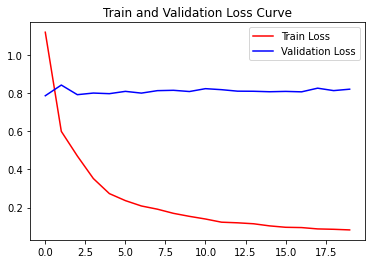

In [150]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [151]:
id_place = range(1,20)

# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(new_data_rating.hotel_id)))
tourism_data[:10]

id_user = 3
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

# print predicted scores
predictions[recommended_tourism_ids]

array([5.078785 , 5.0700307, 5.069444 , 5.065115 , 5.059166 , 5.0586705,
       5.05866  , 5.0577464, 5.0534115, 5.0507507], dtype=float32)

In [152]:
# Creating dataset for making recommendations for the first user
hotel_data = np.array(list(set(new_data_rating.hotel_id)))
hotel_data[:5]

array([0, 1, 2, 3, 4])

In [153]:
user = np.array([1 for i in range(len(hotel_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [154]:
predictions = model.predict([user, hotel_data])

predictions = np.array([a[0] for a in predictions])

recommended_item_ids = (-predictions).argsort()[:5]

recommended_item_ids

array([ 313,  533, 1053,  784,  698])

In [155]:
# print predicted scores
predictions[recommended_item_ids]

array([5.0592566, 5.05593  , 5.053402 , 5.0523643, 5.051212 ],
      dtype=float32)

In [163]:
id_place = range(1,20)

# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(new_data_rating.hotel_id)))
tourism_data

array([   0,    1,    2, ..., 1430, 1431, 1432])

In [167]:
id_user = 3
user = np.array([id_user for i in range(len(tourism_data))])
user

array([3, 3, 3, ..., 3, 3, 3])

In [168]:
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

array([ 784,  313,  698, 1032,  974,  533, 1053,  164,   37,  480])

In [169]:
predictions[recommended_tourism_ids]

array([5.078785 , 5.0700307, 5.069444 , 5.065115 , 5.059166 , 5.0586705,
       5.05866  , 5.0577464, 5.0534115, 5.0507507], dtype=float32)